Source: https://www.programmersought.com/article/45455885835/

In [1]:
path = r"C:\Users\Gaurav\Downloads\WowLabz\WowLabz_mobility_prediction\Dataset"
file = r"\go_track_trackspoints.csv"

Instructions for updating:
non-resource variables are not supported in the long term
Number of samples: 18107, dimension: 2


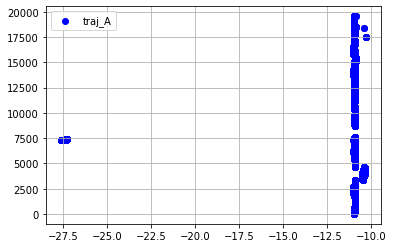

x
 (18099, 6, 2)
y
 (18099, 2)
Train on 18099 samples
Epoch 1/100
18099/18099 [==============================] - 4s 209us/sample - loss: 0.0180 - acc: 0.9466
Epoch 2/100
18099/18099 [==============================] - 4s 199us/sample - loss: 0.0046 - acc: 0.9587
Epoch 3/100
18099/18099 [==============================] - 4s 196us/sample - loss: 0.0040 - acc: 0.9615
Epoch 4/100
18099/18099 [==============================] - 4s 200us/sample - loss: 0.0035 - acc: 0.9633
Epoch 5/100
18099/18099 [==============================] - 4s 203us/sample - loss: 0.0033 - acc: 0.9653
Epoch 6/100
18099/18099 [==============================] - 3s 193us/sample - loss: 0.0030 - acc: 0.9659
Epoch 7/100
18099/18099 [==============================] - 3s 191us/sample - loss: 0.0028 - acc: 0.9645
Epoch 8/100
18099/18099 [==============================] - 3s 192us/sample - loss: 0.0026 - acc: 0.9637s - loss: 0.0026 - acc: 0
Epoch 9/100
18099/18099 [==============================] - 3s 188us/sample - loss: 0.0024

18099/18099 [==============================] - 3s 185us/sample - loss: 3.0791e-04 - acc: 0.9744
Epoch 76/100
18099/18099 [==============================] - 3s 188us/sample - loss: 2.8500e-04 - acc: 0.9764
Epoch 77/100
18099/18099 [==============================] - 4s 194us/sample - loss: 3.0604e-04 - acc: 0.9762
Epoch 78/100
18099/18099 [==============================] - 3s 193us/sample - loss: 2.8827e-04 - acc: 0.9756
Epoch 79/100
18099/18099 [==============================] - 3s 183us/sample - loss: 2.8948e-04 - acc: 0.9760
Epoch 80/100
18099/18099 [==============================] - 3s 187us/sample - loss: 3.0131e-04 - acc: 0.9749
Epoch 81/100
18099/18099 [==============================] - 4s 193us/sample - loss: 2.8594e-04 - acc: 0.9741
Epoch 82/100
18099/18099 [==============================] - 3s 188us/sample - loss: 2.8837e-04 - acc: 0.9758
Epoch 83/100
18099/18099 [==============================] - 3s 190us/sample - loss: 2.9147e-04 - acc: 0.9750
Epoch 84/100
18099/18099 [======

In [ ]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential, load_model
from keras.callbacks import Callback
#import keras.backend.tensorflow_backend as KTF
import tensorflow as tf
import pandas as pd
import os
import  keras.callbacks
import matplotlib.pyplot as plt

 
def create_dataset(data,n_predictions,n_next):
    '''
         Process the data
    '''
    dim = data.shape[1]
    train_X, train_Y = [], []
    for i in range(data.shape[0]-n_predictions-n_next-1):
        a = data[i:(i+n_predictions), :]
        train_X.append(a)
        tempb = data[(i+n_predictions):(i+n_predictions+n_next), :]
        b = []
        for j in range(len(tempb)):
            for k in range(dim):
                b.append(tempb[j, k])
        train_Y.append(b)
    train_X = np.array(train_X, dtype='float64')
    train_Y = np.array(train_Y, dtype='float64')
 
    test_X, test_Y = [], []
    i = data.shape[0]-n_predictions-n_next-1
    a = data[i:(i + n_predictions), :]
    test_X.append(a)
    tempb = data[(i + n_predictions):(i + n_predictions + n_next), :]
    b = []
    for j in range(len(tempb)):
        for k in range(dim):
            b.append(tempb[j, k])
    test_Y.append(b)
    test_X = np.array(test_X, dtype='float64')
    test_Y = np.array(test_Y, dtype='float64')
 
    return train_X, train_Y, test_X, test_Y
 
def NormalizeMult(data, set_range):
    '''
         Return the normalized data and the maximum and minimum values
    '''
    normalize = np.arange(2*data.shape[1], dtype='float64')
    normalize = normalize.reshape(data.shape[1], 2)
 
    for i in range(0, data.shape[1]):
        if set_range == True:
            list = data[:, i]
            listlow, listhigh = np.percentile(list, [0, 100])
        else:
            if i == 0:
                listlow = -90
                listhigh = 90
            else:
                listlow = -180
                listhigh = 180
 
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
 
        delta = listhigh - listlow
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data, normalize
 
def trainModel(train_X, train_Y):
    '''
         trainX, trainY: the data needed to train the LSTM model
    '''
    model = Sequential()
    model.add(LSTM(
        120,
        input_shape=(train_X.shape[1], train_X.shape[2]),
        return_sequences=True))
    model.add(Dropout(0.3))
 
    model.add(LSTM(
        120,
        return_sequences=False))
    model.add(Dropout(0.3))
 
    model.add(Dense(
        train_Y.shape[1]))
    model.add(Activation("relu"))
 
    model.compile(loss='mse', optimizer='adam', metrics=['acc'])
    model.fit(train_X, train_Y, epochs=100, batch_size=64, verbose=1)
    model.summary()
 
    return model
 
if __name__ == "__main__":
    train_num = 6
    per_num = 1
    # set_range = False
    set_range = True
 
    # Read in time series file data
    data = pd.read_csv(path+file).iloc[:, 0:2].values
    print("Number of samples: {0}, dimension: {1}".format(data.shape[0], data.shape[1]))
    # print(data)
 
    # Painting sample database
    plt.scatter(data[:, 1], data[:, 0], c='b', marker='o', label='traj_A')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()
 
    #Normalized 
    data, normalize = NormalizeMult(data, set_range)
    # print(normalize)
 
    #Generate training data
    train_X, train_Y, test_X, test_Y = create_dataset(data, train_num, per_num)
    print("x\n", train_X.shape)
    print("y\n", train_Y.shape)
 
  
    # Training model
    model = trainModel(train_X, train_Y)
    loss, acc = model.evaluate(train_X, train_Y, verbose=2)
    print('Loss : {}, Accuracy: {}'.format(loss, acc * 100))
 
    # Save model
    np.save("./traj_model_trueNorm.npy", normalize)
    model.save("./traj_model_120.h5")

In [ ]:
import copy

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def mse(predictions, targets):
    return ((predictions - targets) ** 2).mean()
 
def reshape_y_hat(y_hat,dim):
    re_y = []
    i = 0
    while i < len(y_hat):
        tmp = []
        for j in range(dim):
            tmp.append(y_hat[i+j])
        i = i + dim
        re_y.append(tmp)
    re_y = np.array(re_y, dtype='float64')
    return re_y
 
 #Multidimensional denormalization
def FNormalizeMult(data,normalize):
 
    data = np.array(data, dtype='float64')
         #Column
    for i in range(0, data.shape[1]):
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
        print("listlow, listhigh, delta", listlow, listhigh, delta)
                 #Row 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = data[j, i]*delta + listlow
 
    return data
 
 #Using normalization of training data
def NormalizeMultUseData(data,normalize):
 
    for i in range(0, data.shape[1]):
 
        listlow = normalize[i, 0]
        listhigh = normalize[i, 1]
        delta = listhigh - listlow
 
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow)/delta
 
    return data
 
from math import sin, asin, cos, radians, fabs, sqrt
EARTH_RADIUS = 6371 # The average radius of the earth, 6371km
 
 # Calculate the straight-line distance between two latitude and longitude
def hav(theta):
    s = sin(theta / 2)
    return s * s
def get_distance_hav(lat0, lng0, lat1, lng1):
    # "Use the haversine formula to calculate the distance between two points on the sphere."
    # Longitude and latitude converted to radians
    lat0 = radians(lat0)
    lat1 = radians(lat1)
    lng0 = radians(lng0)
    lng1 = radians(lng1)
 
    dlng = fabs(lng0 - lng1)
    dlat = fabs(lat0 - lat1)
    h = hav(dlat) + cos(lat0) * cos(lat1) * hav(dlng)
    distance = 2 * EARTH_RADIUS * asin(sqrt(h))
    return distance
 
if __name__ == '__main__':
    test_num = 6
    per_num = 1
    data_all = pd.read_csv(path+file).iloc[-2*(test_num+per_num):-1*(test_num+per_num), 0:2].values
    data_all.dtype = 'float64'
 
    data = copy.deepcopy(data_all[:-per_num, :])
    y = data_all[-per_num:, :]
  
    # #Normalized 
    normalize = np.load("./traj_model_trueNorm.npy")
    data = NormalizeMultUseData(data, normalize)
 
    model = load_model("./traj_model_120.h5")
    test_X = data.reshape(1, data.shape[0], data.shape[1])
    y_hat = model.predict(test_X)
    location_y = y_hat
    print("Pred coord:" ,y_hat)
    y_hat = y_hat.reshape(y_hat.shape[1])
    y_hat = reshape_y_hat(y_hat, 2)
 
    #Antinormalization
    y_hat = FNormalizeMult(y_hat, normalize)
    print("predict: {0}\ntrue：{1}".format(y_hat, y))
    print('Mean square error of prediction:', mse(y_hat, y))
    print('Predicted straight-line distance: {:.4f} KM'.format(get_distance_hav(y_hat[0, 0], y_hat[0, 1], y[0, 0], y[0, 1])))
 
   
    # Draw test sample database
    p1 = plt.scatter(data_all[:-per_num, 1], data_all[:-per_num, 0], c='b', marker='o', label='traj_A')
    p2 = plt.scatter(y_hat[:, 1], y_hat[:, 0], c='r', marker='o', label='pre')
    p3 = plt.scatter(y[:, 1], y[:, 0], c='g', marker='o', label='pre_true')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()

In [ ]:
location_y
data = [[1.0000103, 0.9615487]]
data

In [ ]:
type(data)

In [ ]:
df = pd.DataFrame(data, columns = ['latitude', 'longitude'])
df

In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(df, lat="latitude", lon="longitude" ,
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_geos(fitbounds="locations", scope="south america")
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()